**Manual Histogram Computation**

**Task**: Implement functions to compute a grayscale image histogram, cumulative distribution function (CDF), and perform histogram equalization — without using any histogram/equalization library functions.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from skimage import io

In [ ]:
img = io.imread(r"/content/drive/MyDrive/Image Processing 2026 @ MSc SEM IV/images/moon.jpg")

In [ ]:
def compute_histogram(img_input):
  if len(img_input.shape) == 2:
    print("GrayScale Image")
    image_type="Gray"
  else:
    print("Color Image")
    image_type="Rgb"

  if image_type == "Gray":
    flat = img_input.flatten()
    hist = np.zeros(256, dtype=int)
    for value in flat:
        hist[value] += 1
    plt.hist(hist, bins=30, range=(0,256), color = "gray")
    plt.title("Grayscale Histogram")
    plt.xlabel("Intensity Value")
    plt.ylabel("Frequency")
    plt.show()
    return hist
  else:
    flat_r = img_input[:,:,0].flatten()
    hist_r = np.zeros(256, dtype=int)
    flat_g = img_input[:,:,1].flatten()
    hist_g = np.zeros(256, dtype=int)
    flat_b = img_input[:,:,2].flatten()
    hist_b = np.zeros(256, dtype=int)
    for value in flat_r:
        hist_r[value] += 1
    for value in flat_g:
        hist_g[value] += 1
    for value in flat_b:
        hist_b[value] += 1
    plt.hist(hist_r, bins=30, range=(0,256), color="red")
    plt.hist(hist_g, bins=30, range=(0,256), color="blue")
    plt.hist(hist_b, bins=30, range=(0,256), color="green")
    plt.title("RGB Histogram")
    plt.xlabel("Intensity Value")
    plt.ylabel("Frequency")
    plt.show()
    return{
        "red":hist_r,
        "green":hist_g,
        "blue":hist_b
    }
  # your code goes here

GrayScale Image


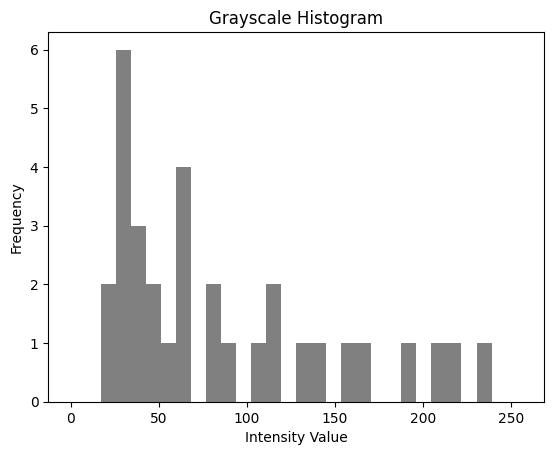

array([885639,   8345,   2924,   2335,   2212,   1900,   1906,   1968,
         1939,   1928,   1980,   1959,   2077,   2042,   2072,   2054,
         2070,   2080,   2220,   2275,   2270,   2396,   2403,   2413,
         2549,   2571,   2621,   2814,   2891,   2865,   2944,   3061,
         3059,   3143,   3146,   3002,   2890,   2868,   2817,   2875,
         2780,   2884,   2849,   2846,   2929,   2968,   2941,   2914,
         2922,   2883,   2871,   2836,   2922,   2819,   2917,   2943,
         3085,   3207,   3283,   3359,   3507,   3769,   3896,   3997,
         4082,   4245,   4291,   4632,   4613,   4586,   4698,   4766,
         4707,   4846,   4764,   4928,   4876,   4779,   4712,   4592,
         4553,   4519,   4420,   4434,   4405,   4362,   4214,   4184,
         4189,   4162,   4013,   4048,   4025,   4016,   3845,   3918,
         3911,   3855,   3810,   3886,   3791,   3763,   3863,   3725,
         3854,   3867,   3828,   3813,   3929,   3711,   3787,   3807,
      

In [ ]:
compute_histogram(img)

In [ ]:
def compute_cdf(histogram):
    cdf = np.zeros(256, dtype=int)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]
    plt.plot(cdf)
    plt.title("CDF")
    return cdf
  # your code goes here

GrayScale Image


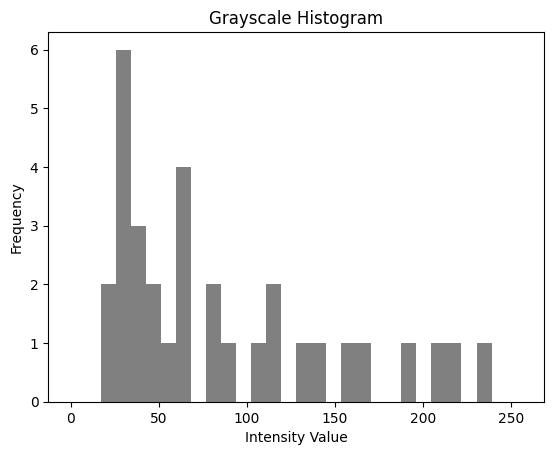

array([ 885639,  893984,  896908,  899243,  901455,  903355,  905261,
        907229,  909168,  911096,  913076,  915035,  917112,  919154,
        921226,  923280,  925350,  927430,  929650,  931925,  934195,
        936591,  938994,  941407,  943956,  946527,  949148,  951962,
        954853,  957718,  960662,  963723,  966782,  969925,  973071,
        976073,  978963,  981831,  984648,  987523,  990303,  993187,
        996036,  998882, 1001811, 1004779, 1007720, 1010634, 1013556,
       1016439, 1019310, 1022146, 1025068, 1027887, 1030804, 1033747,
       1036832, 1040039, 1043322, 1046681, 1050188, 1053957, 1057853,
       1061850, 1065932, 1070177, 1074468, 1079100, 1083713, 1088299,
       1092997, 1097763, 1102470, 1107316, 1112080, 1117008, 1121884,
       1126663, 1131375, 1135967, 1140520, 1145039, 1149459, 1153893,
       1158298, 1162660, 1166874, 1171058, 1175247, 1179409, 1183422,
       1187470, 1191495, 1195511, 1199356, 1203274, 1207185, 1211040,
       1214850, 1218

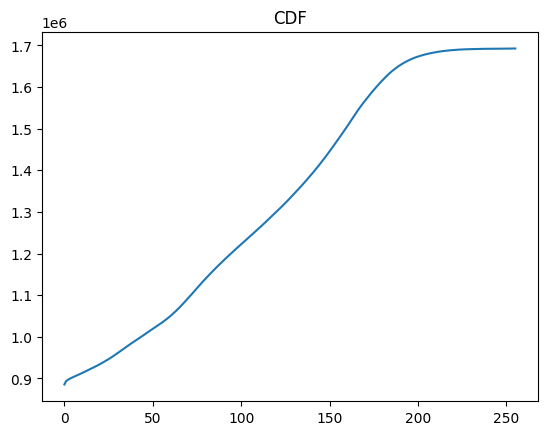

In [ ]:
compute_cdf(compute_histogram(img))

In [ ]:
def hist_equalization(cdf):
  cdf_min = np.min(cdf[np.nonzero(cdf)])
  cdf_max = np.max(cdf)
  cdf_balanced = (cdf - cdf_min)/(cdf_max - cdf_min) * 255

  cdf_incorrect=cdf/cdf_max*255

  plt.figure()
  plt.plot(cdf_balanced, linewidth=2)
  plt.plot(cdf_incorrect, linestyle="--")
  plt.legend(["Balanced", "Incorrect"])
  plt.title("CDF Comparison")
  plt.show()
  return cdf_balanced
  # your code goes here

GrayScale Image


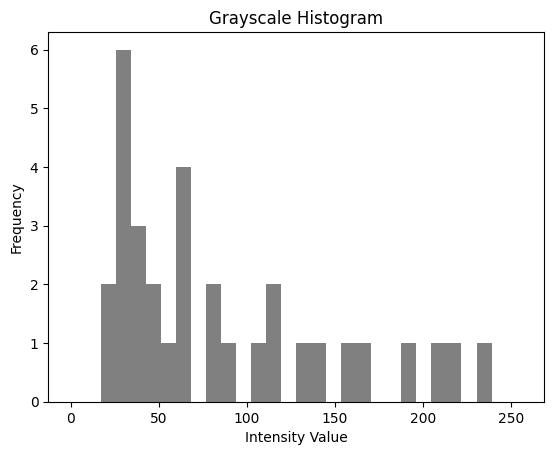

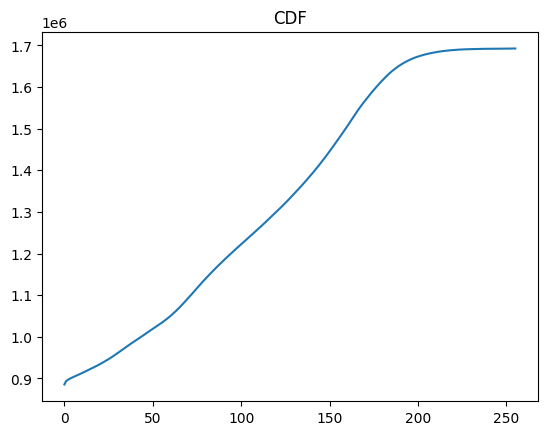

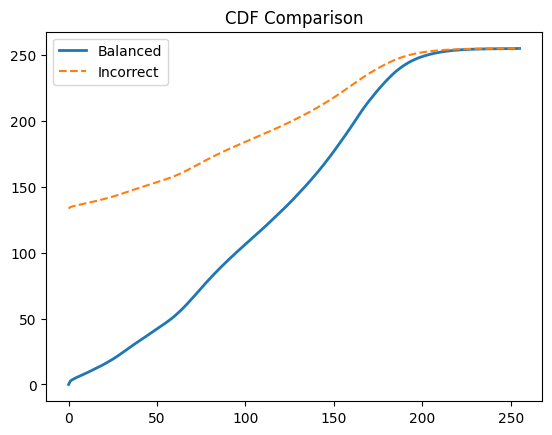

array([  0.        ,   2.63702335,   3.56100852,   4.29886946,
         4.99786235,   5.59826311,   6.20055988,   6.82244867,
         7.43517345,   8.04442222,   8.67010302,   9.2891478 ,
         9.94548064,  10.59075346,  11.24550629,  11.89457111,
        12.54869194,  13.20597278,  13.90749367,  14.62639458,
        15.3437155 ,  16.10085246,  16.86020142,  17.62271039,
        18.42819541,  19.24063245,  20.0688695 ,  20.95809463,
        21.87165179,  22.77699294,  23.70729812,  24.67457535,
        25.64122058,  26.63440984,  27.6285471 ,  28.57718031,
        29.49042147,  30.39671062,  31.28688375,  32.19538491,
        33.07386602,  33.98521118,  34.88549633,  35.78483347,
        36.71039864,  37.64828784,  38.57764502,  39.49847019,
        40.42182336,  41.33285252,  42.24008967,  43.13626681,
        44.05961998,  44.95042511,  45.87219828,  46.80218747,
        47.7770487 ,  48.79046199,  49.82789131,  50.88933666,
        51.99755007,  53.18855558,  54.41969315,  55.68

In [ ]:
hist_equalization(compute_cdf(compute_histogram(img)))

In [ ]:
img1 = io.imread(r"/content/drive/MyDrive/Image Processing 2026 @ MSc SEM IV/images/profile.jpg")


Color Image


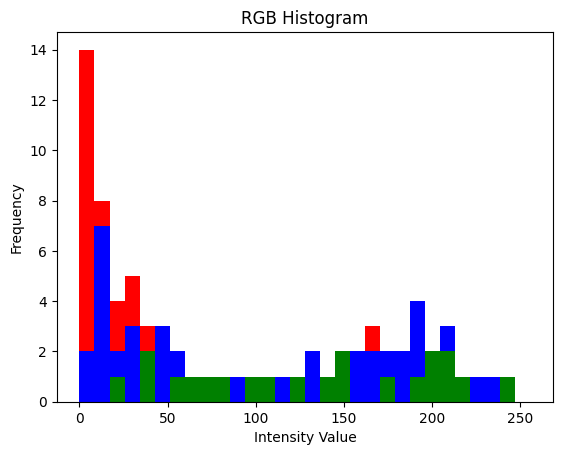

{'red': array([   15,     1,     3,     2,     3,     6,     4,     6,     6,
            4,     6,     5,    10,     7,     8,     6,    10,    16,
           16,    11,    17,    14,    18,    20,    24,    27,    24,
           28,    26,    34,    33,    36,    38,    41,    47,    58,
           80,   158,   265,   345,   616,   934,  1202,  1426,  1207,
         1096,  1083,  1016,   973,   843,   884,   897,   984,  1016,
         1036,   948,   953,  1011,  1003,  1150,  1192,  1265,  1595,
         1438,  1395,  1375,  1613,  1615,  1681,  1975,  1979,  1997,
         1974,  2131,  2388,  2074,  2169,  2088,  2581,  2446,  2231,
         2124,  2088,  1948,  2021,  2029,  1911,  1998,  1872,  1965,
         1781,  1861,  1860,  1795,  1848,  1785,  1807,  1859,  1821,
         1942,  1931,  1871,  1822,  1837,  1772,  1850,  1752,  1615,
         1679,  1496,  1510,  1601,  1554,  1604,  1554,  1700,  1724,
         1708,  1536,  1759,  1679,  1786,  1782,  1746,  1932,  1952,

In [ ]:
hist_color = compute_histogram(img1)
hist_color

array([   197,    220,    255,    297,    357,    426,    484,    563,
          662,    766,    892,   1038,   1183,   1358,   1505,   1696,
         1897,   2115,   2321,   2568,   2853,   3167,   3546,   3978,
         4376,   4821,   5193,   5535,   5902,   6257,   6595,   6975,
         7354,   7706,   8062,   8427,   8761,   9092,   9435,   9772,
        10098,  10454,  10769,  11094,  11448,  11786,  12140,  12467,
        12788,  13107,  13410,  13735,  14066,  14388,  14737,  15087,
        15448,  15810,  16219,  16606,  17024,  17441,  17971,  18487,
        18971,  19500,  20056,  20716,  21341,  22038,  22775,  23531,
        24285,  25151,  26030,  26906,  27791,  28826,  30209,  31659,
        33303,  35354,  37528,  39600,  41557,  43517,  45413,  47271,
        48920,  50593,  52277,  53901,  55675,  57364,  59175,  61060,
        62962,  64824,  66641,  68566,  70502,  72536,  74707,  76809,
        79051,  81405,  83881,  86505,  89218,  91997,  95009,  98137,
      

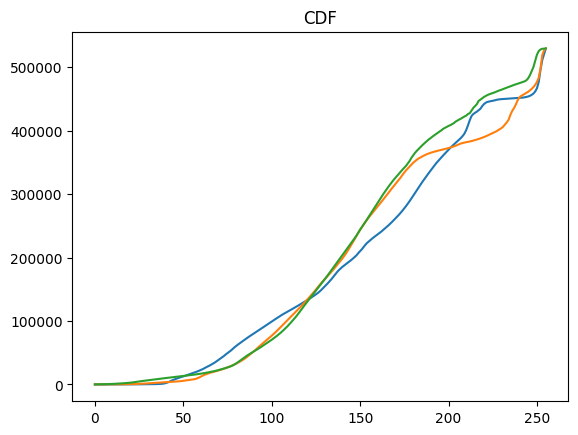

In [ ]:
compute_cdf(hist_color["red"])
compute_cdf(hist_color["green"])
compute_cdf(hist_color["blue"])